In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [9]:
df1=pd.read_csv(r'/Users/puravdoshi/Downloads/Data Analysis with Python/Data Analytics Projects/Election_spending_analysis/elections-data/advertisers.csv')
df2=pd.read_csv(r'/Users/puravdoshi/Downloads/Data Analysis with Python/Data Analytics Projects/Election_spending_analysis/elections-data/locations.csv')
df3=pd.read_csv(r'/Users/puravdoshi/Downloads/Data Analysis with Python/Data Analytics Projects/Election_spending_analysis/elections-data/results.csv')

In [10]:
df1.head()

,Page ID,Page name,Disclaimer,Amount spent (INR),Number of ads in Library
0,121439954563203,Bharatiya Janata Party (BJP),Bharatiya Janata Party (BJP),193854342,43455
1,351616078284404,Indian National Congress,Indian National Congress,108787100,846
2,132715103269897,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,73361399,1799
3,192856493908290,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,32294327,680
4,109470364774303,Ellorum Nammudan,Populus Empowerment Network Private Limited,22399499,879


In [11]:
df2.head()

,Location name,Amount spent (INR)
0,Andaman and Nicobar Islands,377858
1,Andhra Pradesh,100819732
2,Arunachal Pradesh,1385654
3,Assam,17478091
4,Bihar,53619242


In [12]:
df3.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase
0,1,1.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0
1,2,2.0,Arunachal Pradesh,Arunachal East,375310,83.31,312658,1.0
2,3,3.0,Arunachal Pradesh,Arunachal West,517384,73.60,380783,1.0
3,4,4.0,Assam,Dibrugarh,1659588,76.75,1273744,1.0
4,5,5.0,Assam,Jorhat,1727121,79.89,1379749,1.0


In [13]:
df3['State'] = df3['State'].str.strip().str.lower()
df2['Location name'] = df2['Location name'].str.strip().str.lower()
new_df=df3.merge(
    df2,
    left_on='State',
    right_on='Location name',
    how='left'
)
new_df.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase,Location name,Amount spent (INR)
0,1,1.0,andaman & nicobar islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0,NaN,NaN
1,2,2.0,arunachal pradesh,Arunachal East,375310,83.31,312658,1.0,arunachal pradesh,1385654.0
2,3,3.0,arunachal pradesh,Arunachal West,517384,73.60,380783,1.0,arunachal pradesh,1385654.0
3,4,4.0,assam,Dibrugarh,1659588,76.75,1273744,1.0,assam,17478091.0
4,5,5.0,assam,Jorhat,1727121,79.89,1379749,1.0,assam,17478091.0


In [21]:
spendings=new_df.groupby('State')['Amount spent (INR)'].sum()
spendings

State
andaman & nicobar islands                0.000000e+00
andhra pradesh                           2.520493e+09
arunachal pradesh                        2.771308e+06
assam                                    2.446933e+08
bihar                                    2.144770e+09
chandigarh                               6.507258e+06
chhattisgarh                             1.628361e+08
dadra & nagar haveli and\ndaman & diu    0.000000e+00
goa                                      4.328418e+06
gujarat                                  1.010635e+09
haryana                                  4.168341e+08
himachal pradesh                         4.804646e+07
jammu and kashmir                        3.287530e+07
jharkhand                                2.293219e+08
karnataka                                1.166463e+09
kerala                                   4.536240e+08
ladakh                                   0.000000e+00
lakshadweep                              1.984700e+04
madhya pradesh        

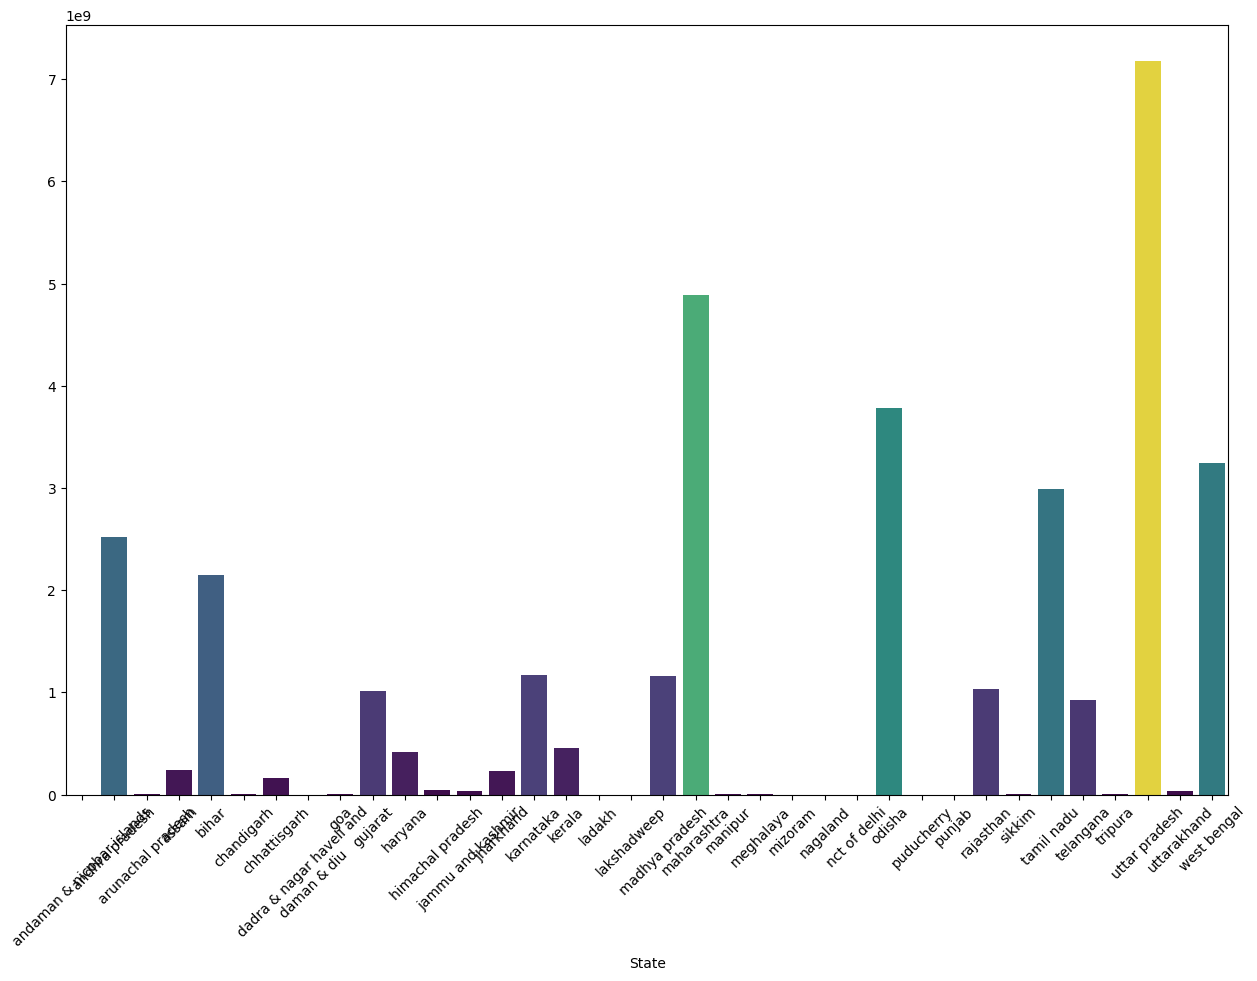

In [26]:
x=spendings.values
y=spendings.index
plt.figure(figsize=(15,10))
sns.barplot(x=y,y=x,palette='viridis',hue=x,legend=False)
plt.xticks(rotation=45)
plt.show()

In [24]:
polls=new_df.groupby('State')['Polled (%)'].mean()
polls

State
andaman & nicobar islands                64.100000
andhra pradesh                           80.770800
arunachal pradesh                        78.455000
assam                                    80.882857
bihar                                    56.329500
chandigarh                               67.980000
chhattisgarh                             73.105455
dadra & nagar haveli and\ndaman & diu    70.645000
goa                                      76.080000
gujarat                                  60.140400
haryana                                  65.019000
himachal pradesh                         70.965000
jammu and kashmir                        58.696000
jharkhand                                66.605000
karnataka                                71.714643
kerala                                   71.189500
ladakh                                   71.820000
lakshadweep                              84.160000
madhya pradesh                           66.970345
maharashtra              

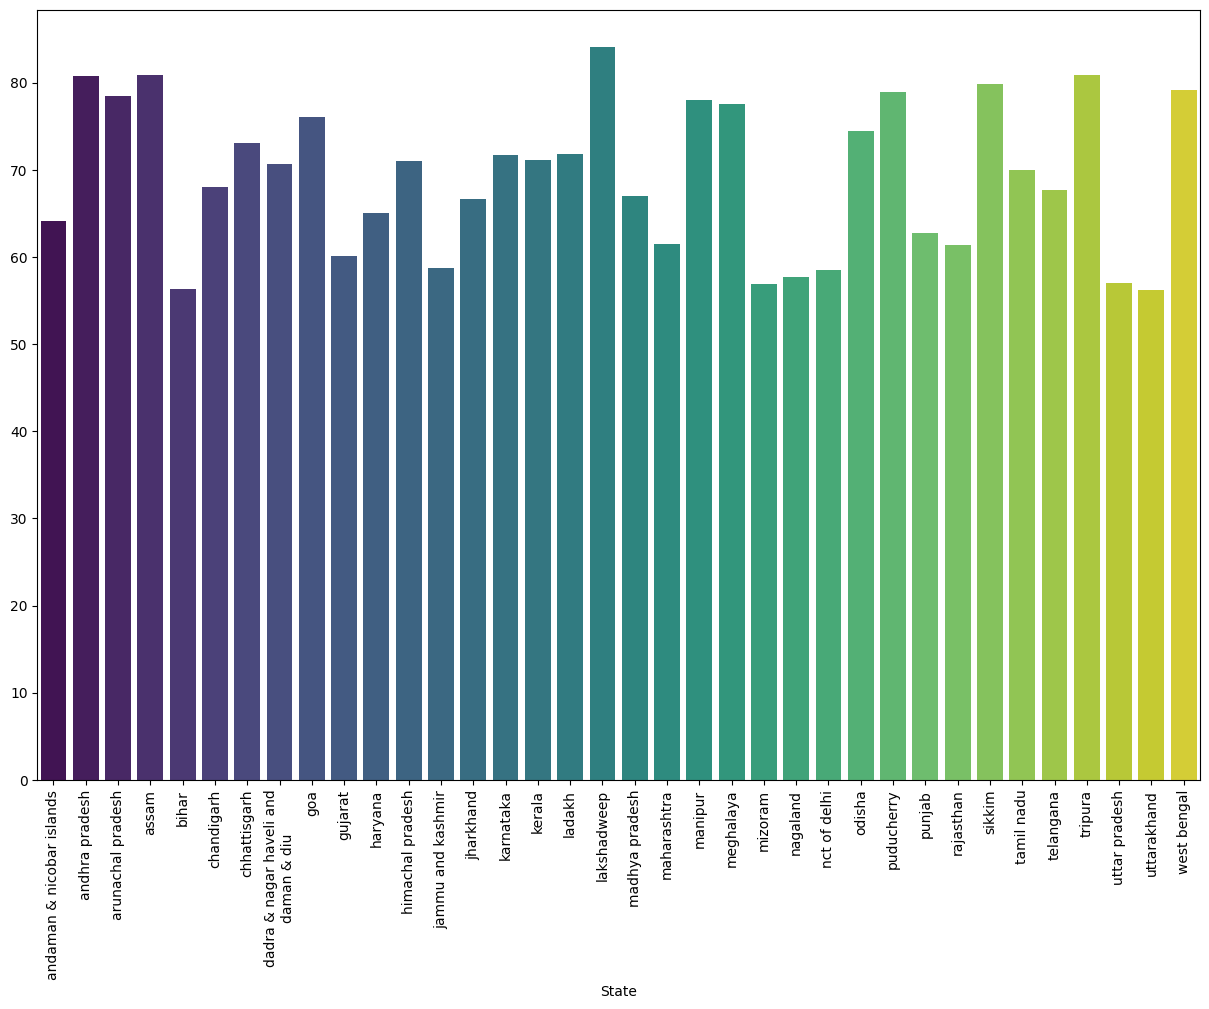

In [28]:
x=polls.index
y=polls.values
plt.figure(figsize=(15,10))
sns.barplot(x=x,y=y,palette='viridis',hue=x,legend=False)
plt.xticks(rotation=90)
plt.show()

In [33]:
df1['Amount spent (INR)']=pd.to_numeric(df1['Amount spent (INR)'],errors='coerce')
df1.dtypes

Page ID                       int64
Page name                    object
Disclaimer                   object
Amount spent (INR)          float64
Number of ads in Library      int64
dtype: object

In [34]:
df1.isnull().sum()

Page ID                        0
Page name                      0
Disclaimer                     0
Amount spent (INR)          8560
Number of ads in Library       0
dtype: int64

In [35]:
df1.dropna(inplace=True)
df1.isnull().sum()

Page ID                     0
Page name                   0
Disclaimer                  0
Amount spent (INR)          0
Number of ads in Library    0
dtype: int64

In [38]:
ad_spend=df1.groupby('Page name')['Amount spent (INR)'].sum().sort_values(ascending=False)
ad_spend

Page name
Bharatiya Janata Party (BJP)                193854342.0
Ama Chinha Sankha Chinha                    112412941.0
Indian National Congress                    108787100.0
Ellorum Nammudan                             23806041.0
BJP Odisha                                   19573782.0
                                               ...     
Ranjit Nath                                       101.0
Old coin selling company in Mumbai India          101.0
chilliestirupati                                  101.0
nihitsirpolity                                    101.0
महा MTB                                           101.0
Name: Amount spent (INR), Length: 11590, dtype: float64

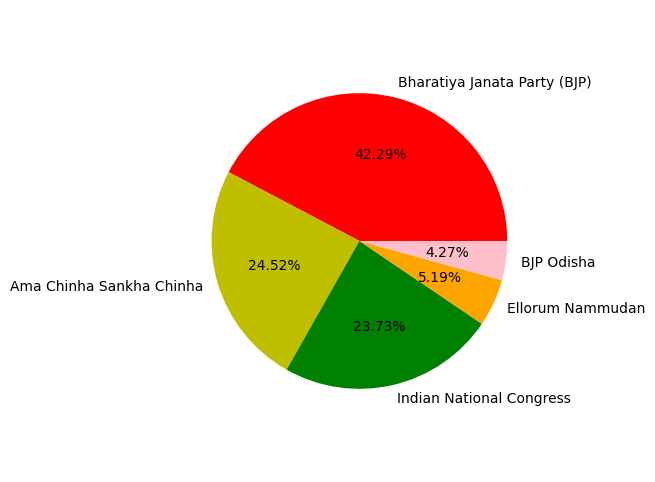

In [41]:
x=ad_spend.index[0:5]
y=ad_spend.values[0:5]
plt.figure(figsize=(8,6))
c=['r','y','g','orange','pink']
plt.pie(y,labels=x,colors=c,radius=0.8,labeldistance=1.1,autopct='%0.2f%%')
plt.show()

In [42]:
new_df.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase,Location name,Amount spent (INR)
0,1,1.0,andaman & nicobar islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0,NaN,NaN
1,2,2.0,arunachal pradesh,Arunachal East,375310,83.31,312658,1.0,arunachal pradesh,1385654.0
2,3,3.0,arunachal pradesh,Arunachal West,517384,73.60,380783,1.0,arunachal pradesh,1385654.0
3,4,4.0,assam,Dibrugarh,1659588,76.75,1273744,1.0,assam,17478091.0
4,5,5.0,assam,Jorhat,1727121,79.89,1379749,1.0,assam,17478091.0


In [43]:
cor=new_df[['Polled (%)','Amount spent (INR)']].corr()
cor

,Polled (%),Amount spent (INR)
Polled (%),1.000000,-0.010688
Amount spent (INR),-0.010688,1.000000


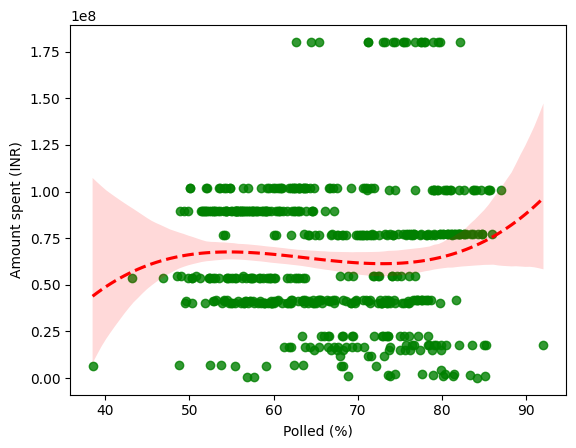

In [46]:
sns.regplot(x='Polled (%)',y='Amount spent (INR)',data=new_df,color='green',line_kws=dict(color='red',linestyle='--'),order=3)
plt.show()

In [47]:
voter_turnout=new_df.groupby('Phase')['Polled (%)'].mean()
voter_turnout

Phase
1.0    67.202136
2.0    67.755393
3.0    65.992660
4.0    70.174948
5.0    62.630400
6.0    63.828814
Name: Polled (%), dtype: float64

In [48]:
ad_spend_phase=new_df.groupby('Phase')['Amount spent (INR)'].sum()
ad_spend_phase

Phase
1.0    5.556265e+09
2.0    3.986936e+09
3.0    4.726512e+09
4.0    7.732806e+09
5.0    4.346064e+09
6.0    3.872711e+09
Name: Amount spent (INR), dtype: float64

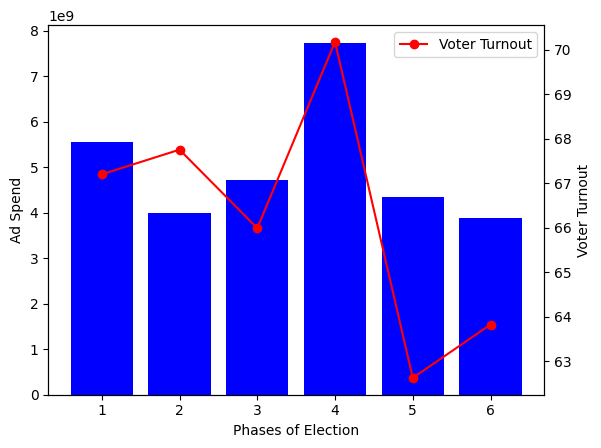

In [52]:
x = ad_spend_phase.index
y1 =voter_turnout.values
y2 =ad_spend_phase.values
fig, ax1 = plt.subplots()
ax1.bar(x, y2, color='b', label='Ad Spend')
ax1.set_ylabel('Ad Spend')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.plot(x, y1, color='r', label='Voter Turnout', marker='o')
ax2.set_ylabel('Voter Turnout')
ax2.tick_params(axis='y')
ax1.set_xlabel('Phases of Election')
plt.legend()
plt.show()